In [1]:
import numpy as np
import pandas as pd
data_vege = pd.read_csv("fr_vegetaux.csv", sep=',')
data_pop = pd.read_csv("fr_population.csv", sep= ',')
data_ani = pd.read_csv("fr_animaux.csv", sep=',')
data_sous_ali = pd.read_csv("fr_sousalimentation.csv", sep=',')
data_sous_ali = data_sous_ali.set_index('Zone') 
data_sous_ali = data_sous_ali.drop(['Chine, continentale', 'Chine, Taiwan Province de','Chine - RAS de Macao','Chine - RAS de Hong-Kong'], axis = 0)
data_sous_ali = data_sous_ali.reset_index()
data_sous_ali = data_sous_ali.drop(['Code Domaine', 'Domaine', 'Code Élément', 'Élément', 'Code Produit','Produit', 'Note', 'Description du Symbole', 'Symbole', 'Code année'], axis = 1)
data_cere = pd.read_csv("fr_ce¦üre¦üales.csv", sep=',')
data_cere = data_cere.drop(['Code Domaine','Domaine','Symbole','Description du Symbole'], axis = 1)
data_vege = data_vege.drop(['Symbole', 'Description du Symbole', 'Code Domaine', 'Domaine' , 'Code Élément'], axis = 1)
data_pop = data_pop.drop(['Symbole', 'Description du Symbole', 'Code Domaine', 'Code année', 'Domaine', 'Code Élément','Élément','Produit'], axis = 1)
data_pop = data_pop.rename(columns = {'Valeur' : 'Population'})
data_ani = data_ani.drop(['Symbole', 'Description du Symbole', 'Code Domaine', 'Domaine', 'Code Élément'], axis = 1)
data_pop = data_pop[['Code zone', 'Zone', 'Population', 'Année', 'Unité']]
data_vege["Origine"] = 'Vegetal'
data_ani["Origine"] = 'Animaux'

# Projet 3 : Etude de santé publique

## Question 1 : Calcul de la population mondiale en 2013

Vérification de l'état des données et la présence de données NaN dans les populations avec la comparaison du nombre de 'code zone' et le nombre de population.

Si le nombre de code zone est plus important que le nombre de population alors le dataset comporte des valeurs manquantes.

In [2]:
data_pop.describe() #il n'y a pas de valeurs manquantes (1.75 +02 = 175)

,Code zone,Population,Année
count,175.000000,1.750000e+02,175.0
mean,126.720000,4.807996e+04,2013.0
std,75.168519,1.786327e+05,0.0
min,1.000000,5.400000e+01,2013.0
25%,64.500000,2.543500e+03,2013.0
50%,121.000000,9.413000e+03,2013.0
75%,188.500000,2.888150e+04,2013.0
max,351.000000,1.416667e+06,2013.0


In [3]:
data_pop.head()

,Code zone,Zone,Population,Année,Unité
0,2,Afghanistan,30552,2013,1000 personnes
1,202,Afrique du Sud,52776,2013,1000 personnes
2,3,Albanie,3173,2013,1000 personnes
3,4,Algérie,39208,2013,1000 personnes
4,79,Allemagne,82727,2013,1000 personnes


Passons maintenant aux calculs :

In [4]:
data_pop = data_pop.drop([ 'Unité'], axis = 1)
nb_total_humain = (data_pop.loc[:,'Population'].sum())*1000 
nb_total_humain  

8413993000

Pour trouver les/l'anomalie(s), nous allons maintenant voir toutes les données supérieures à 100 millions dans le but de voir s'il y a des intrus.

In [5]:
data_pop[data_pop.Population > 100000]

,Code zone,Zone,Population,Année
14,16,Bangladesh,156595,2013
24,21,Brésil,200362,2013
33,351,Chine,1416667,2013
36,41,"Chine, continentale",1385567,2013
55,231,États-Unis d'Amérique,320051,2013
57,185,Fédération de Russie,142834,2013
75,100,Inde,1252140,2013
76,101,Indonésie,249866,2013
84,110,Japon,127144,2013
107,138,Mexique,122332,2013


Pourquoi y a-t-il 2 "chine" ?

In [6]:
data_pop.iloc[33:40,:]

,Code zone,Zone,Population,Année
33,351,Chine,1416667,2013
34,96,Chine - RAS de Hong-Kong,7204,2013
35,128,Chine - RAS de Macao,566,2013
36,41,"Chine, continentale",1385567,2013
37,214,"Chine, Taiwan Province de",23330,2013
38,50,Chypre,1141,2013
39,44,Colombie,48321,2013


Comme on peut le voir la Chine est présente comme ses "régions", je vais donc supprimer ses régions.

In [7]:
data_pop = data_pop.set_index('Zone')
data_pop = data_pop.drop(['Chine, continentale', 'Chine, Taiwan Province de','Chine - RAS de Macao','Chine - RAS de Hong-Kong'], axis = 0)
data_pop = data_pop.reset_index()
nb_total_humain = (data_pop.loc[:,'Population'].sum())*1000
nb_total_humain

6997326000

Nous voici donc avec un résultat plus réaliste.

Cependant, si l'on se base sur les résultats de l'INED (l'Institut National d'Etudes Démographiques), la population mondiale est égale à 7 141 millions de personnes, ce qui nous donne un montant différent que celui que l'on a trouvé. On peut déjà émettre une critique à propos la population chinoise et se demander si les populations de Hong-Kong, de Taïwan, ou encore de Macao sont comptées dans la population de la Chine (puisque ces dernières sont mentionnées comme des provinces chinoises), chose qui n'est pas forcément le cas dans les autres instituts (par exemple, l'INED donne une population chinoise s'élevant à 1 360 700 000 de personnes), biaisant nos résultats. Cependant, le fait de les compter en tant que pays à part entière n'est pas forcément un bonne chose puisque ce ne sont pas des pays indépendants (ils ne sont pas reconnus par l'Organisation des Nations Unies).

Il y a une autre critique que l'on peut émettre. Il est possible qu'il puisse manquer les données de certains pays. Ainsi, il faudrait vérifier en détail, la présence ou de ces derniers, rajouter des données fiables,... Cela demanderais un travail fastidieux.

## Question 2 : Bilan Alimentaire

Equation = Production + Importations + Variation de stocks = Disponibilité Intérieure + Exportations = (Aliments pour animaux + Semences + Pertes + Traitement + Autres Utilisateurs + Nourriture) + Exportations

### Le blé en France : 

Production = 38 614

Importations = 2 055

Variation de stocks = 1 131

Disponibilités intérieures = 20 298 

Exportations = 21 502

Aliments pour animaux = 7 822

Semences = 748

Pertes = 358

Traitement = 1 575

Autres Utilisateurs = 2 824

Nourriture = 6 971

38 614  +  2 055  +  1 131  =  20 298  +  21 502  =  (748  +  358  +  1 575  +  2 824  +  6 971)  +  21 502  =  41800

## Question 3 : La disponibilité alimentaire

On commence par la jointure pour ajouter les données des populations à notre Dataframe

In [8]:
data_dispo_ali = data_ani.append(data_vege)

In [9]:
del data_ani, data_vege

In [10]:
data_dispo_ali

,Code zone,Zone,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Origine
0,2,Afghanistan,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,Animaux
1,2,Afghanistan,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,Animaux
2,2,Afghanistan,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,Animaux
3,2,Afghanistan,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,Animaux
4,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Animaux
...,...,...,...,...,...,...,...,...,...,...
104866,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,2680,Aliments pour enfants,2013,2013,g/personne/jour,0.00,Vegetal
104867,181,Zimbabwe,Disponibilité de matière grasse en quantité (g...,2680,Aliments pour enfants,2013,2013,g/personne/jour,0.00,Vegetal
104868,181,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2013,2013,Kcal/personne/jour,2.00,Vegetal
104869,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2013,2013,g/personne/jour,0.07,Vegetal


In [11]:
data_dispo_ali = data_dispo_ali.reset_index()
data_dispo_ali = data_dispo_ali.pivot_table(index = ['Année','Code zone','Zone','Code Produit','Produit','Origine'], columns = 'Élément',values="Valeur", aggfunc=sum)
data_dispo_ali = data_dispo_ali.reset_index()

In [12]:
data_dispo_ali

Élément,Année,Code zone,Zone,Code Produit,Produit,Origine,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,2013,1,Arménie,2511,Blé,Vegetal,93.0,0.0,1024.0,130.60,...,30.52,554.0,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0
1,2013,1,Arménie,2513,Orge,Vegetal,137.0,26.0,0.0,0.00,...,0.00,198.0,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0
2,2013,1,Arménie,2514,Maïs,Vegetal,96.0,NaN,0.0,0.03,...,0.01,102.0,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN
3,2013,1,Arménie,2515,Seigle,Vegetal,1.0,NaN,1.0,0.12,...,0.02,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0
4,2013,1,Arménie,2516,Avoine,Vegetal,4.0,NaN,2.0,0.37,...,0.09,6.0,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,2013,351,Chine,2781,Huiles de Poissons,Animaux,47.0,80.0,0.0,0.00,...,0.00,127.0,13.0,91.0,0.0,NaN,50.0,NaN,NaN,0.0
15698,2013,351,Chine,2782,Huiles de Foie de Poisso,Animaux,0.0,0.0,0.0,0.00,...,0.00,0.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,0.0
15699,2013,351,Chine,2805,Riz (Eq Blanchi),Vegetal,12117.0,2085.0,797.0,77.45,...,14.47,135024.0,565.0,2714.0,109725.0,6406.0,136873.0,4679.0,12.0,-3998.0
15700,2013,351,Chine,2848,Lait - Excl Beurre,Animaux,1632.0,42.0,59.0,33.18,...,3.12,50117.0,233.0,9780.0,47009.0,1433.0,40570.0,NaN,0.0,0.0


In [13]:
dispo_ali_pop = pd.merge(data_dispo_ali, data_pop, left_on = 'Code zone', right_on = 'Code zone')

In [14]:
dispo_ali_pop.iloc[0:10, 0:5]

,Année_x,Code zone,Zone_x,Code Produit,Produit
0,2013,1,Arménie,2511,Blé
1,2013,1,Arménie,2513,Orge
2,2013,1,Arménie,2514,Maïs
3,2013,1,Arménie,2515,Seigle
4,2013,1,Arménie,2516,Avoine
5,2013,1,Arménie,2517,Millet
6,2013,1,Arménie,2518,Sorgho
7,2013,1,Arménie,2520,"Céréales, Autres"
8,2013,1,Arménie,2531,Pommes de Terre
9,2013,1,Arménie,2532,Manioc


### Calcul des disponibilités alimentaires

In [15]:
dispo_ali_pop['Disponibilité alimentaire en Kcal'] = dispo_ali_pop.loc[:,'Disponibilité alimentaire (Kcal/personne/jour)']*dispo_ali_pop.loc[:,'Population']*365*1000
dispo_ali_pop['Disponibilité alimentaire en kg de protéines'] = dispo_ali_pop.loc[:,'Disponibilité de protéines en quantité (g/personne/jour)']*dispo_ali_pop.loc[:,'Population']*365*1000/1000
dispo_ali_pop.drop(['Zone_y'], axis = 1)
dispo_ali_pop = dispo_ali_pop.rename(columns  = {'Zone_x' : 'Zone'})
dispo_ali_pop

,Année_x,Code zone,Zone,Code Produit,Produit,Origine,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Pertes,Production,Semences,Traitement,Variation de stock,Zone_y,Population,Année_y,Disponibilité alimentaire en Kcal,Disponibilité alimentaire en kg de protéines
0,2013,1,Arménie,2511,Blé,Vegetal,93.0,0.0,1024.0,130.60,...,32.0,312.0,30.0,10.0,-118.0,Arménie,2977,2013,1.112684e+12,3.316318e+07
1,2013,1,Arménie,2513,Orge,Vegetal,137.0,26.0,0.0,0.00,...,15.0,189.0,14.0,7.0,0.0,Arménie,2977,2013,0.000000e+00,0.000000e+00
2,2013,1,Arménie,2514,Maïs,Vegetal,96.0,NaN,0.0,0.03,...,7.0,21.0,0.0,NaN,NaN,Arménie,2977,2013,0.000000e+00,1.086605e+04
3,2013,1,Arménie,2515,Seigle,Vegetal,1.0,NaN,1.0,0.12,...,0.0,1.0,0.0,NaN,0.0,Arménie,2977,2013,1.086605e+09,2.173210e+04
4,2013,1,Arménie,2516,Avoine,Vegetal,4.0,NaN,2.0,0.37,...,0.0,5.0,0.0,NaN,NaN,Arménie,2977,2013,2.173210e+09,9.779445e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,2013,351,Chine,2781,Huiles de Poissons,Animaux,47.0,80.0,0.0,0.00,...,NaN,50.0,NaN,NaN,0.0,Chine,1416667,2013,0.000000e+00,0.000000e+00
15321,2013,351,Chine,2782,Huiles de Foie de Poisso,Animaux,0.0,0.0,0.0,0.00,...,NaN,0.0,NaN,NaN,0.0,Chine,1416667,2013,0.000000e+00,0.000000e+00
15322,2013,351,Chine,2805,Riz (Eq Blanchi),Vegetal,12117.0,2085.0,797.0,77.45,...,6406.0,136873.0,4679.0,12.0,-3998.0,Chine,1416667,2013,4.121155e+14,7.482198e+09
15323,2013,351,Chine,2848,Lait - Excl Beurre,Animaux,1632.0,42.0,59.0,33.18,...,1433.0,40570.0,NaN,0.0,0.0,Chine,1416667,2013,3.050792e+13,1.613300e+09


## Question 4 : Les ratios

### Calcul des ratios

In [16]:
dispo_ali_pop['Ratio (Energie/Poids)'] = dispo_ali_pop.loc[:,'Disponibilité alimentaire en Kcal']/(dispo_ali_pop.loc[:,'Nourriture']*1e6)
dispo_ali_pop['Ratio de protéines (Poids Protéines / Poids Total)'] = dispo_ali_pop.loc[:,'Disponibilité alimentaire en kg de protéines']/(dispo_ali_pop.loc[:,'Nourriture']*1e6)

dispo_ali_pop = dispo_ali_pop.replace(0,)
dispo_ali_pop['Ratio (Energie/Poids)'] = dispo_ali_pop['Ratio (Energie/Poids)'].replace([np.inf, -np.inf], np.nan)

dispo_ali_pop['Ratio de protéines (Poids Protéines / Poids Total)'] = dispo_ali_pop['Ratio de protéines (Poids Protéines / Poids Total)'].replace([np.inf, -np.inf], np.nan)

### Calories 

In [17]:
dispo_ali_pop[dispo_ali_pop['Produit'] == 'Oeufs']['Ratio (Energie/Poids)'].mean()

1343.4403490225568

Pour vérifier si nos données sont exactes, nous allons comparer nos données avec la valeur calorique d'un oeuf.

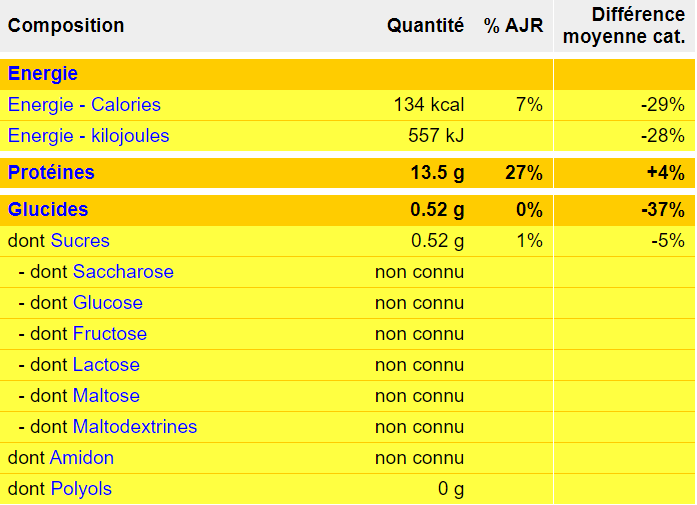
Source : https://informationsnutritionnelles.fr/oeuf-dur

On peut voir sur ce tableau que pour 100 grammes nous avons 134 kilocalories. Par conséquent, quel ratio (Energie / Poids) ça nous donnes ?

In [18]:
gr = 100/1000
kil = 134 #     Oeuf dur 
rat = kil/gr
rat

1340.0

Notre ratio est égal à 1340 ce qui est quasiment égal à nos chiffres dans notre tableau.

On peut constater ci-dessus que notre ratio est quasiment au niveau de la médiane. Par conséquent, on peut déduire que c'est un ratio tout à fait normal et que nos données sont justes.

### Protéines

A présent, passons à la comparaison de la teneur en protéines de l'avoine et de nos données. 

In [19]:
print('Teneur en protéines de l\'Avoine :', dispo_ali_pop[dispo_ali_pop['Produit'] == 'Avoine']['Ratio de protéines (Poids Protéines / Poids Total)'].mean())

Teneur en protéines de l'Avoine : 0.08436571123972142


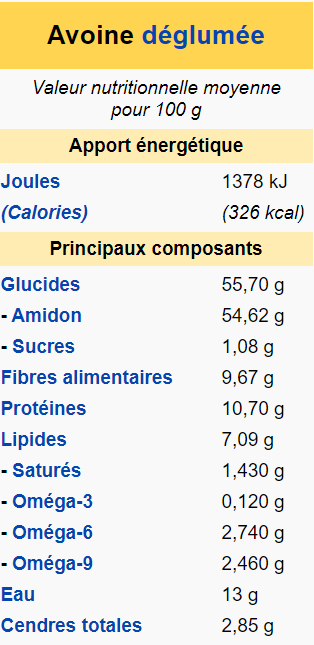
Source : https://fr.wikipedia.org/wiki/Avoine_cultiv%C3%A9e

On aperçoit ci-dessus que pour 100 g d'avoine, nous avons 10,7 g de protéines. Maintenant, faisons le calcul :

In [20]:
avoi = 100
pro = 10.70
ten = (pro / avoi)
print(ten)

0.107


Ainsi, 0.107 de l'avoine sont des protéines. Ce dernier est proche de notre moyenne arrondie de 0.09 trouvée avec nos données. On peut, de ce fait en déduire que nos données sont exactes. 

## Question 5 : Ratios Calories / Protéines

In [21]:
tri_n1 = dispo_ali_pop.groupby(['Produit']).mean().sort_values(by = 'Ratio (Energie/Poids)', ascending = False)
tri_n2 = dispo_ali_pop.groupby(['Produit']).mean().sort_values(by = 'Ratio de protéines (Poids Protéines / Poids Total)', ascending = False)

### Classement des aliments en fonction de leur ratio calorique

#### Top 5

In [22]:
tri_n1['Ratio (Energie/Poids)'][:5]

Produit
Huiles de Foie de Poisso    9588.565208
Huile de Son de Riz         9379.568137
Huile de Sésame             9240.576603
Huiles de Poissons          9003.715504
Huile de Germe de Maïs      8903.396892
Name: Ratio (Energie/Poids), dtype: float64

### Classement des aliments en fonction de leur pourcentage de protéines

#### Top 5 

In [23]:
tri_n2['Ratio de protéines (Poids Protéines / Poids Total)'][:5]

Produit
Soja                      0.285156
Arachides Decortiquees    0.251573
Pois                      0.223219
Légumineuses Autres       0.220366
Haricots                  0.216532
Name: Ratio de protéines (Poids Protéines / Poids Total), dtype: float64

## Question 6 :  Disponibilité intérieure

In [24]:
data_bil_ali_vege = dispo_ali_pop[dispo_ali_pop['Origine'] == 'Vegetal']
dispo_int_vege_kcal = (data_bil_ali_vege.loc[:,'Disponibilité intérieure']*1e6*data_bil_ali_vege.loc[:,'Ratio (Energie/Poids)']).sum()

In [25]:
print('Voici la disponibilité intérieure mondiale des végétaux : ',dispo_int_vege_kcal,'Kcal')

Voici la disponibilité intérieure mondiale des végétaux :  1.2825176874992174e+16 Kcal


## Question 7 : Besoins mondiaux

### Calories

In [26]:
print('Voici la disponibilité intérieure mondiale des végétaux : ',dispo_int_vege_kcal,'Kcal')

Voici la disponibilité intérieure mondiale des végétaux :  1.2825176874992174e+16 Kcal


Une kilocalorie est égal à 1000 calories. Pour une population d'individus ordinaire, 100% masculine, on va se baser sur 2400 calories par jour (chiffre le plus cité).

In [27]:
pop_1 = dispo_int_vege_kcal/(2400*365)
print("On est capable de nourrir ", pop_1, "individus de genre masculin sans activité physique régulière")

On est capable de nourrir  14640612870.995632 individus de genre masculin sans activité physique régulière


Pour un population d'individus ordinaire, 100% féminine, on va se baser sur 1800 calories par jour (chiffre le plus cité).

In [28]:
pop_2 = dispo_int_vege_kcal/(1800*365)
print("On est capable de nourrir ", pop_2, "individus de genre féminin sans activité physique régulière")

On est capable de nourrir  19520817161.32751 individus de genre féminin sans activité physique régulière


Pour un population d'individus ordinaire, à parité égale, on va se baser sur 2100 kilocalories par jour (la moyenne de nos 2 montants).

In [29]:
pop_3 = dispo_int_vege_kcal/(2100*365)
print("On est capable de nourrir ", pop_3, "individus de genre masculin ou féminin sans activité physique régulière")

On est capable de nourrir  16732128995.42358 individus de genre masculin ou féminin sans activité physique régulière


In [30]:
pop_mond = 6997326000
print("Sur l'ensemble de la population mondiale on est capable d'en nourrir ", (pop_3/pop_mond)*100,"%")

Sur l'ensemble de la population mondiale on est capable d'en nourrir  239.12175873217257 %


### Protéines 

In [31]:
dispo_int_vege_pro = (data_bil_ali_vege.loc[:,'Disponibilité intérieure']*1e6*data_bil_ali_vege.loc[:,'Ratio de protéines (Poids Protéines / Poids Total)']).sum()
print('Voici la disponibilité intérieure mondiale des végétaux : ',dispo_int_vege_pro,'Kg')

Voici la disponibilité intérieure mondiale des végétaux :  301873075874.702 Kg


Pour une population composé de personne sédentaire pesant 62 kilos en moyenne, nous allons voir comment bien de personnes vont avoir leurs besoins en protéines comblés.

In [32]:
pop_pro = dispo_int_vege_pro/(0.8e-3*62*365)
pop_mond = 6997326000
pro_mond = pop_mond

#### Besoins mondiaux en protéines

In [33]:
print("On est capable de subvenir aux besoins de ", pop_pro, " personnes") 
print("La disponibilité en protéines est capable de subvenir à ", (pop_pro/pro_mond)*100, "% de la population mondiale")

On est capable de subvenir aux besoins de  16674385543.233648  personnes
La disponibilité en protéines est capable de subvenir à  238.29653703762907 % de la population mondiale


### Question 8 : Capacités alimentaires

In [34]:
dispo_ali_vege_kcal = (((data_bil_ali_vege.loc[:,'Aliments pour animaux']+data_bil_ali_vege.loc[:,'Pertes'])*data_bil_ali_vege.loc[:,'Ratio (Energie/Poids)']*1e6)+data_bil_ali_vege.loc[:,'Disponibilité alimentaire en Kcal']).sum()
dispo_ali_vege_pro = (((data_bil_ali_vege.loc[:,'Aliments pour animaux']+data_bil_ali_vege.loc[:,'Pertes'])*data_bil_ali_vege.loc[:,'Ratio de protéines (Poids Protéines / Poids Total)']*1e6)+data_bil_ali_vege.loc[:,'Disponibilité alimentaire en kg de protéines']).sum()

Quelle serait la disponibilité alimentaire mondiale si les produits végétaux destinées aux animaux et les pertes étaient utilisés pour la nourriture humaine ?

### Calories 

In [35]:
print('Voici la disponibilité intérieure mondiale des végétaux : ',dispo_ali_vege_kcal,'Kcal')

Voici la disponibilité intérieure mondiale des végétaux :  6370577035251982.0 Kcal


In [36]:
cap_1 = dispo_ali_vege_kcal/(2400*365)
print("On est capable de nourrir ", cap_1, "individus de genre masculin sans activité physique régulière")

On est capable de nourrir  7272348213.75797 individus de genre masculin sans activité physique régulière


Pour un population d'individus ordinaire, 100% féminine, on va se baser sur 1800 calories par jour (chiffre le plus cité).

In [37]:
cap_2 = dispo_ali_vege_kcal/(1800*365)
print("On est capable de nourrir ", cap_2, "individus de genre féminin sans activité physique régulière")

On est capable de nourrir  9696464285.010628 individus de genre féminin sans activité physique régulière


In [38]:
cap_3 = dispo_ali_vege_kcal/(2100*365)
print("On est capable de nourrir ", cap_3, "individus de genre masculin ou féminin sans activité physique régulière")

On est capable de nourrir  8311255101.43768 individus de genre masculin ou féminin sans activité physique régulière


In [39]:
pop_mond = 6997326000
print("Sur l'ensemble de la population mondiale on est capable d'en nourrir ", (cap_3/pop_mond)*100,"%")

Sur l'ensemble de la population mondiale on est capable d'en nourrir  118.77758877373556 %


### Protéines 

In [40]:
print('Voici la disponibilité intérieure mondiale des végétaux : ',dispo_ali_vege_pro,'Kg')

Voici la disponibilité intérieure mondiale des végétaux :  172624396518.91815 Kg


Pour une population composé de personne sédentaire pesant 62 kilos en moyenne, nous allons voir comment bien de personnes vont avoir leurs besoins en protéines comblés.

In [41]:
cap_pro = dispo_ali_vege_pro/(0.8e-3*62*365)
pop_mond = 6997326000

#### Besoins mondiaux en protéines

In [42]:
print("On est capable de subvenir aux besoins de ", cap_pro, " personnes") 
print("La disponibilité en protéines est capable de subvenir à ", (cap_pro/pop_mond)*100, "% de la population mondiale")

On est capable de subvenir aux besoins de  9535152260.214214  personnes
La disponibilité en protéines est capable de subvenir à  136.26851543309851 % de la population mondiale


## Question 9 : Disponibilité alimentaire mondiale 

In [43]:
dispo_ali_mond_kcal = dispo_ali_pop.loc[:,'Disponibilité alimentaire en Kcal'].sum()
dispo_ali_mond_pro = dispo_ali_pop.loc[:,'Disponibilité alimentaire en kg de protéines'].sum()

### Calories 

In [44]:
print('Voici la disponibilité intérieure mondiale : ',dispo_ali_mond_kcal,'Kcal')

Voici la disponibilité intérieure mondiale :  8936108423680000.0 Kcal


In [45]:
dispo_1 = dispo_ali_mond_kcal/(2400*365)
print("On est capable de nourrir ", dispo_1, "individus de genre masculin sans activité physique régulière")

On est capable de nourrir  10201037013.333334 individus de genre masculin sans activité physique régulière


Pour un population d'individus ordinaire, 100% féminine, on va se baser sur 1800 calories par jour (chiffre le plus cité).

In [46]:
dispo_2 = dispo_ali_mond_kcal/(1800*365)
print("On est capable de nourrir ", dispo_2, "individus de genre féminin sans activité physique régulière")

On est capable de nourrir  13601382684.444445 individus de genre féminin sans activité physique régulière


In [47]:
dispo_3 = dispo_ali_mond_kcal/(2100*365)
print("On est capable de nourrir ", dispo_3, "individus de genre masculin ou féminin sans activité physique régulière")

On est capable de nourrir  11658328015.238094 individus de genre masculin ou féminin sans activité physique régulière


In [48]:
pop_mond = 6997326000
print("Sur l'ensemble de la population mondiale on est capable d'en nourrir ", (dispo_3/pop_mond)*100,"%")

Sur l'ensemble de la population mondiale on est capable d'en nourrir  166.61118854885558 %


### Protéines 

In [49]:
print('Voici la disponibilité intérieure mondiale des végétaux : ',dispo_ali_mond_pro,'Kg')

Voici la disponibilité intérieure mondiale des végétaux :  248616939817.55 Kg


Pour une population composé de personne sédentaire pesant 62 kilos en moyenne, nous allons voir comment bien de personnes vont avoir leurs besoins en protéines comblés.

In [50]:
cap_pro_mond = dispo_ali_mond_pro/(0.8e-3*62*365)

#### Besoins mondiaux en protéines

In [51]:
print("On est capable de subvenir aux besoins de ", cap_pro_mond, " personnes") 
print("La disponibilité en protéines est capable de subvenir à ", (cap_pro_mond/pop_mond)*100, "% de la population mondiale")

On est capable de subvenir aux besoins de  13732707678.830643  personnes
La disponibilité en protéines est capable de subvenir à  196.25650825516266 % de la population mondiale


## Question 10 : Sous-nutrition 

In [52]:
data_sous_ali[data_sous_ali.Valeur == '<0.1'] = data_sous_ali[data_sous_ali.Valeur == '<0.1'].replace('<0.1', 0.01)
data_sous_ali.loc[:,'Valeur'] = data_sous_ali.loc[:,'Valeur'].astype('float')

pop_sous_nut = data_sous_ali[data_sous_ali['Année'] == '2012-2014']['Valeur'].sum()*1e6

In [53]:
data_sous_sous = data_sous_ali[data_sous_ali['Année'] == '2012-2014']
data_sous_ali_pop = pd.merge(data_sous_sous, data_pop, left_on = 'Code zone', right_on = 'Code zone')
data_sous_ali_pop['Valeur'] = data_sous_ali_pop['Valeur']*1e6

### Population mondiale en sous-nutrition en 2013

In [54]:
sous_nu = pop_sous_nut
print('En 2013, la population mondiale en mondiale en sous_nutrition s\'élevait à', sous_nu, 'de personnes en moyenne')
print('Cela représente', (sous_nu/pop_mond)*100, '% de la population mondiale')

En 2013, la population mondiale en mondiale en sous_nutrition s'élevait à 744020000.0 de personnes en moyenne
Cela représente 10.632918917883774 % de la population mondiale


## Question 11 : L'arrivée de Boo

### Création du Booléan 

In [55]:
data_boo = list(data_cere['Code Produit'])
data_majin = list(dispo_ali_pop['Code Produit'])
Is_cere = []
x = 0
for data in data_majin:
           
        if data in data_boo:
            Is_cere.append(True)
        else:
            Is_cere.append(False)

            
dispo_ali_pop['Is_cere'] = Is_cere
dispo_cere_boo = dispo_ali_pop[dispo_ali_pop['Is_cere'] == True]
dispo_cere = dispo_cere_boo['Disponibilité intérieure'].sum()
anie_maux = dispo_cere_boo['Aliments pour animaux'].sum()

### Céréales destinées aux humains 

In [56]:
print('Humains :', dispo_cere,' t')

Humains : 2608098.0  t


### Céréales destinées aux animaux

In [57]:
print('Céréales destinées aux animaux :', anie_maux,' t')

Céréales destinées aux animaux : 979228.0  t


### Proportion des céréales animales parmi les céréales destinées à l'alimentation 

In [58]:
print('Les céréales destinées à l\'alimentation animales représentent', (anie_maux/(dispo_cere+anie_maux))*100, '% des céréales destinées à l\'alimentation')

Les céréales destinées à l'alimentation animales représentent 27.296877953104904 % des céréales destinées à l'alimentation


## Question 12 :  Les boucles

### Boucle des pays en sous-nutrition

In [59]:
pays_sous = list(data_sous_ali['Zone'])
pays_majin = list(dispo_ali_pop['Zone'])
Is_sous = []

for pays in pays_majin:
           
        if pays in pays_sous:
            Is_sous.append(True)
        else:
            Is_sous.append(False)

            
dispo_ali_pop['Is_sous_alimenté?'] = Is_sous
dispo_sous_nut_boo = dispo_ali_pop[dispo_ali_pop['Is_sous_alimenté?'] == True]

### Boucle des produits les plus exportés

In [60]:
prod_export = list(dispo_ali_pop['Produit'])
prod_majin = list(dispo_ali_pop['Produit'])
Is_export = []
x = 0
for produit in prod_majin:
           
        if produit in prod_export:
            Is_export.append(True)
        else:
            Is_export.append(False)

            
dispo_ali_pop['Is_export?'] = Is_export

dispo_export_boo = dispo_ali_pop[dispo_ali_pop['Is_export?'] == True]

dispo_export_boo_fin = dispo_export_boo.groupby(['Produit']).sum()
dispo_export_boo_fin = dispo_export_boo_fin.reset_index()
dispo_export_boo_fin = dispo_export_boo_fin.sort_values(by = 'Exportations - Quantité', ascending = False)[:15]

### Boucle des importations les importantes

In [61]:
prod_import = list(dispo_export_boo_fin['Produit'])
Is_import = []
x = 0
for produit in prod_majin:
           
        if produit in prod_import:
            Is_import.append(True)
        else:
            Is_import.append(False)

            
dispo_ali_pop['Is_import?'] = Is_import
dispo_import_boo = dispo_ali_pop[dispo_ali_pop['Is_import?'] == True]
dispo_import_sort = dispo_import_boo.sort_values(by = 'Importations - Quantité', ascending = False)[0:200]
dispo_import_sort = dispo_import_sort.groupby(['Produit']).sum()

In [62]:
dispo_import_sort['Ratio (Autres utilisations (non alimentaire)/Disponibilité intérieure)'] = dispo_import_sort.loc[:,'Autres utilisations (non alimentaire)']/dispo_import_sort.loc[:,'Disponibilité intérieure']
dispo_import_sort['Ratio (Aliments pour animaux/Disponibilité intérieure + Aliments pour animaux)'] = dispo_import_sort.loc[:,'Aliments pour animaux']/(dispo_import_sort.loc[:,'Disponibilité intérieure']+dispo_import_sort.loc[:,'Aliments pour animaux'])
ratio_1 = dispo_import_sort.sort_values(by = 'Ratio (Autres utilisations (non alimentaire)/Disponibilité intérieure)', ascending = False)
ratio_2 = dispo_import_sort.sort_values(by = 'Ratio (Aliments pour animaux/Disponibilité intérieure + Aliments pour animaux)', ascending = False)

### Ratio (Autres utilisations (non alimentaire)/Disponibilité intérieure)

### Top 3

In [63]:
ratio_1['Ratio (Autres utilisations (non alimentaire)/Disponibilité intérieure)'][:3]

Produit
Huile de Palme    0.723990
Manioc            0.265781
Maïs              0.264413
Name: Ratio (Autres utilisations (non alimentaire)/Disponibilité intérieure), dtype: float64

### Ratio (Aliments pour animaux/Disponibilité intérieure + Aliments pour animaux)

### Top 3

In [64]:
ratio_2['Ratio (Aliments pour animaux/Disponibilité intérieure + Aliments pour animaux)'][:3]

Produit
Orge      0.379310
Manioc    0.364825
Maïs      0.363120
Name: Ratio (Aliments pour animaux/Disponibilité intérieure + Aliments pour animaux), dtype: float64

## Question 13 : Baisse de la production au USA 

In [65]:
dispo_import = dispo_import_boo[dispo_import_boo['Is_cere'] == True]

df_usa = dispo_import[(dispo_import['Is_cere'] == True)&(dispo_import['Zone'] == 'États-Unis d\'Amérique')]
prod_cere = (df_usa['Aliments pour animaux']*1e6).sum()

Combien de tonnes de vegetaux cela pourrait libérer si les USA baissaient de 10% leur production d'aliments pour animaux ?

In [66]:
print('Cela permettrait de libérer :',prod_cere*0.1, 't')

Cela permettrait de libérer : 13584400000.0 t


In [67]:
prod_cere_kcal = (df_usa['Aliments pour animaux']*df_usa['Ratio (Energie/Poids)']*1e6).sum()
prod_cere_pro = (df_usa['Aliments pour animaux']*df_usa['Ratio de protéines (Poids Protéines / Poids Total)']*1e6).sum()
dispo_pro_cere = prod_cere_kcal/(2100*365)
cap_cere_pro = prod_cere_pro/(0.8e-3*62*365)           #               A enlever


In [68]:
print(dispo_pro_cere)
print((dispo_pro_cere/pop_mond)*100)  #               A enlever
print(cap_cere_pro)
print((cap_cere_pro/pop_mond)*100)

487750561.6132107
6.970527907563699
391340588.34628356
5.592716251126267


## Question 14 : Données

In [69]:
manu_thai = dispo_ali_pop[(dispo_ali_pop.Zone == 'Thaïlande')&(dispo_ali_pop.Produit == 'Manioc')]
sous_thai = data_sous_ali[(data_sous_ali.Zone == 'Thaïlande')&(data_sous_ali.Année == '2012-2014')]
tsu_thai = dispo_ali_pop[dispo_ali_pop.Zone == 'Thaïlande']

### Exportation de manioc en Thaïlande 

In [70]:
print('Voici la proportion du Manioc qui est exporté en Thaïlande :', (manu_thai.loc[:,'Exportations - Quantité'].sum()/(manu_thai.loc[:,'Exportations - Quantité'].sum()+manu_thai.loc[:,'Disponibilité intérieure'].sum()))*100, '%')

Voici la proportion du Manioc qui est exporté en Thaïlande : 80.10038757227271 %


### Proportion des personnes sous-alimentées en Thaïlande

In [71]:
print('Voici la part de la population en sous-nutrition en Thaïlande :', ((sous_thai.loc[:,'Valeur'].mean())/(tsu_thai.loc[:,'Population'].mean()*1000))*100, '% de la population totale')

Voici la part de la population en sous-nutrition en Thaïlande : 8.356836937219262e-06 % de la population totale


## Question 15 : Table Population

### Mise en forme 

In [72]:
population = data_pop 
population['Population'] = population['Population']*1000
population = population.rename(columns = {'Année':'annee','Zone':'pays','Code zone':'code_pays','Population':'population'})
population = population[['pays', 'code_pays', 'annee', 'population']]

### Exportation 

In [73]:
import sqlite3
conn = sqlite3.connect('Projet3.db')
print ("Opened database successfully");
c = conn.cursor()

Opened database successfully


In [74]:
# DROP IF EXISTS
c.execute('DROP TABLE IF EXISTS population')
# Création de la table popuation
c.execute('''CREATE TABLE population (
            pays TEXT,
            code_pays INTEGER,
            annee INTEGER,
            population REAL,
            CONSTRAINT pays_annee PRIMARY KEY (code_pays, annee))''')
conn.commit()

In [75]:
population.to_sql("population", conn, if_exists = "append", index = False)

## Question 16 : Table Disponibilité Alimentaire

### Mise en forme 

In [76]:
dispo_alim = data_dispo_ali.drop(['Aliments pour animaux', 'Autres utilisations (non alimentaire)','Exportations - Quantité','Importations - Quantité', 'Nourriture', 'Pertes', 'Production','Semences', 'Traitement', 'Variation de stock','Autres utilisations (non alimentaire)', 'Disponibilité intérieure'], axis = 1)
dispo_alim['Disponibilité alimentaire en quantité (kg/personne/an)'] = (data_dispo_ali['Disponibilité alimentaire en quantité (kg/personne/an)']*dispo_ali_pop['Population'])/1000

dispo_alim = dispo_alim.rename(columns = {'Année':'annee','Zone':'pays','Code zone':'code_pays','Origine':'origine','Produit':'produit','Disponibilité alimentaire en quantité (kg/personne/an)' : 'dispo_alim_tonnes', 'Code Produit': 'code_produit','Disponibilité alimentaire (Kcal/personne/jour)':'dispo_alim_kcal_p_j','Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mat_gr','Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot' })
dispo_alim = dispo_alim[['pays','code_pays', 'annee','produit','code_produit', 'origine', 'dispo_alim_tonnes', 'dispo_alim_kcal_p_j', 'dispo_prot', 'dispo_mat_gr']]

### Exportation 

In [77]:
# DROP IF EXISTS
c.execute('DROP TABLE IF EXISTS dispo_alim')
# Création de la table dispo_alim
c.execute('''CREATE TABLE dispo_alim(
            pays TEXT,
            code_pays INTEGER,
            annee INTEGER,
            produit TEXT,
            code_produit INTEGER,
            origine TEXT,
            dispo_alim_tonnes REAL,
            dispo_alim_kcal_p_j REAL,
            dispo_prot REAL,
            dispo_mat_gr REAL,
            CONSTRAINT pays_annee PRIMARY KEY (code_pays, annee, code_produit))''')
conn.commit()

In [78]:
dispo_alim.to_sql("dispo_alim", conn, if_exists = "append", index = False)

## Question 17 : Table Equilibre des produits

### Mise en forme 

In [79]:
dispo_ali_pop

,Année_x,Code zone,Zone,Code Produit,Produit,Origine,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Population,Année_y,Disponibilité alimentaire en Kcal,Disponibilité alimentaire en kg de protéines,Ratio (Energie/Poids),Ratio de protéines (Poids Protéines / Poids Total),Is_cere,Is_sous_alimenté?,Is_export?,Is_import?
0,2013,1,Arménie,2511,Blé,Vegetal,93.0,0.0,1024.0,130.60,...,2977,2013,1.112684e+12,3.316318e+07,2860.368946,0.085252,True,True,True,True
1,2013,1,Arménie,2513,Orge,Vegetal,137.0,26.0,1024.0,130.60,...,2977,2013,1.112684e+12,3.316318e+07,NaN,NaN,True,True,True,True
2,2013,1,Arménie,2514,Maïs,Vegetal,96.0,NaN,1024.0,0.03,...,2977,2013,1.112684e+12,1.086605e+04,NaN,NaN,True,True,True,True
3,2013,1,Arménie,2515,Seigle,Vegetal,1.0,NaN,1.0,0.12,...,2977,2013,1.086605e+09,2.173210e+04,NaN,NaN,True,True,True,True
4,2013,1,Arménie,2516,Avoine,Vegetal,4.0,NaN,2.0,0.37,...,2977,2013,2.173210e+09,9.779445e+04,2173.210000,0.097794,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,2013,351,Chine,2781,Huiles de Poissons,Animaux,47.0,80.0,9.0,9.24,...,1416667,2013,4.653751e+12,3.567876e+08,NaN,NaN,False,True,True,False
15321,2013,351,Chine,2782,Huiles de Foie de Poisso,Animaux,47.0,80.0,9.0,9.24,...,1416667,2013,4.653751e+12,3.567876e+08,NaN,NaN,False,True,True,False
15322,2013,351,Chine,2805,Riz (Eq Blanchi),Vegetal,12117.0,2085.0,797.0,77.45,...,1416667,2013,4.121155e+14,7.482198e+09,3755.894405,0.068190,True,True,True,True
15323,2013,351,Chine,2848,Lait - Excl Beurre,Animaux,1632.0,42.0,59.0,33.18,...,1416667,2013,3.050792e+13,1.613300e+09,648.980490,0.034319,False,True,True,True


In [80]:
equilibre_prod = data_dispo_ali.drop(['Exportations - Quantité','Importations - Quantité', 'Origine','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Production','Disponibilité de protéines en quantité (g/personne/jour)','Variation de stock'], axis = 1)
equilibre_prod = equilibre_prod.rename(columns = {'Année':'annee','Zone':'pays','Code zone':'code_pays','Produit':'produit','Code Produit': 'code_produit','Aliments pour animaux' : 'alim_ani','Autres utilisations (non alimentaire)':'autres_utilisations','Disponibilité intérieure':'dispo_int','Nourriture':'nourriture','Pertes':'pertes','Semences':'semences','Traitement':'transfo'})
equilibre_prod = equilibre_prod[['code_pays','pays', 'annee', 'code_produit','produit', 'dispo_int', 'alim_ani', 'semences', 'pertes', 'transfo', 'nourriture', 'autres_utilisations']] 

### Exportation 

In [81]:
# DROP IF EXISTS
c.execute('DROP TABLE IF EXISTS equilibre_prod')
# Création de la table dispo_alim
c.execute('''CREATE TABLE equilibre_prod (
            pays TEXT,
            code_pays INTEGER,
            annee INTEGER,
            produit TEXT,
            code_produit INTEGER,
            dispo_int REAL,
            alim_ani REAL,
            semences REAL,
            pertes REAL,
            transfo REAL,
            nourriture REAL,
            autres_utilisations REAL,
            CONSTRAINT pays_annee PRIMARY KEY (code_pays, annee, code_produit))''')
conn.commit()

In [82]:
equilibre_prod.to_sql("equilibre_prod", conn, if_exists = "append", index = False)

## Question 18 : Table Sous-Nutrition

### Mise en forme 

In [83]:
sous_nutrition = data_sous_ali.drop(['Unité'], axis = 1)
sous_nutrition['Valeur'] = sous_nutrition['Valeur']
sous_nutrition.loc[sous_nutrition['Année'] == '2012-2014','Année'] = 2013
sous_nutrition.loc[sous_nutrition['Année'] == '2013-2015','Année'] = 2014
sous_nutrition.loc[sous_nutrition['Année'] == '2014-2016','Année'] = 2015
sous_nutrition.loc[sous_nutrition['Année'] == '2015-2017','Année'] = 2016
sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018','Année'] = 2017
sous_nutrition = sous_nutrition.rename(columns = {'Année':'annee','Zone':'pays','Code zone':'code_pays','Valeur' : 'nb_personnes'})
sous_nutrition = sous_nutrition[['pays','code_pays', 'annee', 'nb_personnes']] 

In [84]:
sous_nutrition

,pays,code_pays,annee,nb_personnes
0,Afghanistan,2,2013,7.9
1,Afghanistan,2,2014,8.8
2,Afghanistan,2,2015,9.6
3,Afghanistan,2,2016,10.2
4,Afghanistan,2,2017,10.6
...,...,...,...,...
995,Zimbabwe,181,2013,6.6
996,Zimbabwe,181,2014,7.2
997,Zimbabwe,181,2015,7.8
998,Zimbabwe,181,2016,8.2


### Exportation 

In [85]:
# DROP IF EXISTS
c.execute('DROP TABLE IF EXISTS sous_nutrition')
# Création de la table dispo_alim
c.execute('''CREATE TABLE sous_nutrition (
            pays TEXT,
            code_pays INTEGER,
            annee INTEGER,
            nb_personnes REAL,
            CONSTRAINT pays_annee PRIMARY KEY (code_pays, annee))''')
conn.commit()

In [86]:
sous_nutrition.to_sql("sous_nutrition", conn, if_exists = "append", index = False)

## Question 19 : SQL

### Requête SQL : ratio kilocalorique (Top 10) 

In [87]:
"""
SELECT 
    d.pays,
    d.code_pays,
    sum(d.dispo_alim_kcal_p_j) AS ratio_kcal
FROM 
    dispo_alim d
GROUP BY 
    d.pays
ORDER BY
    ratio_kcal DESC
LIMIT 10
"""

'\nSELECT \n    d.pays,\n    d.code_pays,\n    sum(d.dispo_alim_kcal_p_j) AS ratio_kcal\nFROM \n    dispo_alim d\nGROUP BY \n    d.pays\nORDER BY\n    ratio_kcal DESC\nLIMIT 10\n'

### Requête SQL : ratio de protéines (Top 10) 

In [88]:
"""
SELECT 
    d.pays,
    d.code_pays,
    sum((d.dispo_prot)) AS ratio_proteines
FROM 
    dispo_alim d
GROUP BY 
    d.pays
ORDER BY
    ratio_proteines DESC
LIMIT 10
"""

'\nSELECT \n    d.pays,\n    d.code_pays,\n    sum((d.dispo_prot)/1000) AS ratio_proteines\nFROM \n    dispo_alim d\nGROUP BY \n    d.pays\nORDER BY\n    ratio_proteines DESC\nLIMIT 10\n'

### Requête SQL : ratio kilocalorique (Flop 10)  

In [89]:
"""
SELECT 
    d.pays,
    d.code_pays,
    d.annee,
    sum(d.dispo_alim_kcal_p_j) AS ratio_kcal
FROM 
    dispo_alim d
GROUP BY 
    d.pays
ORDER BY
    ratio_kcal ASC
LIMIT 10
"""

'\nSELECT \n    d.pays,\n    d.code_pays,\n    d.annee,\n    sum(d.dispo_alim_kcal_p_j) AS ratio_kcal\nFROM \n    dispo_alim d\nGROUP BY \n    d.pays\nORDER BY\n    ratio_kcal ASC\nLIMIT 10\n'

### Requête SQL : ratio de protéines (Flop 10) 

In [90]:
"""
SELECT 
    d.pays,
    d.code_pays,
    d.annee,
    sum((d.dispo_prot)) AS ratio_proteines
FROM 
    dispo_alim d
GROUP BY 
    d.pays
ORDER BY
    ratio_proteines ASC
LIMIT 10
"""

'\nSELECT \n    d.pays,\n    d.code_pays,\n    d.annee,\n    sum((d.dispo_prot)/1000) AS ratio_proteines\nFROM \n    dispo_alim d\nGROUP BY \n    d.pays\nORDER BY\n    ratio_proteines ASC\nLIMIT 10\n'

### Requête SQL : pertes de produits en 2013

In [91]:
"""
SELECT 
    e.code_pays,
    e.pays,
    e.annee,
    sum(e.pertes)*1000 AS pertes
FROM 
    equilibre_prod e
GROUP BY 
    e.pays
"""

'\nSELECT \n    e.code_pays,\n    e.pays,\n    e.annee,\n    sum(e.pertes)*1000 AS pertes\nFROM \n    equilibre_prod e\nGROUP BY \n    e.pays\n'

### Requête SQL : proportion des personnes sous-alimentées

In [92]:
"""
SELECT 
    s.code_pays,
    s.pays,
    sum((s.nb_personnes/(p.population)))*100 AS proportion_sous_nutrition
FROM 
    sous_nutrition s
INNER JOIN 
    population p 
    ON p.annee = s.annee 
    AND s.code_pays = p.code_pays
GROUP BY 
    s.pays
ORDER BY 
    proportion_sous_nutrition DESC
LIMIT 10
"""

'\nSELECT \n    s.code_pays,\n    s.pays,\n    sum((s.nb_personnes/(p.population)))*100 AS proportion_sous_nutrition\nFROM \n    sous_nutrition s\nINNER JOIN \n    population p \n    ON p.annee = s.annee \n    AND s.code_pays = p.code_pays\nGROUP BY \n    s.pays\nORDER BY \n    proportion_sous_nutrition DESC\nLIMIT 10\n'

### Requête SQL : ratio Autres utilisations/Disponibilité intérieure (Top 10)

In [93]:
"""
SELECT 
    e.code_produit,
    e.produit,
    (sum(e.autres_utilisations)/sum(e.dispo_int))*100 AS ratio_autre
FROM 
    equilibre_prod e
GROUP BY 
    e.produit
ORDER BY
    ratio_autre DESC
LIMIT 10
"""

'\nSELECT \n    e.code_produit,\n    e.produit,\n    (sum(e.autres_utilisations)/sum(e.dispo_int))*100 AS ratio_autre\nFROM \n    equilibre_prod e\nGROUP BY \n    e.produit\nORDER BY\n    ratio_autre DESC\nLIMIT 10\n'

## Question 20 : Autres utilisations 

### Alcool, non Comestible 

L'alcool non comestible, appelé également alcool éthylique, est utilisé dans une grande varité de domaines, notamment la médecine ou la cosmétologie. En effet, par exemple, l'alcool est le principal composant des gels hydroalcooliques. Pour qu'ils soient efficaces, il nous faut une teneur minimum en alcool à 60%.
L'alcool éthylique est également utilisé pour la fabrication de l'éthanol. Ce dernier va pouvoir avoir des applications dans les domaines de la pharmaceutiques et la comestologie mais aussi comme combustible. L'éthanol est un biocarburant, alternative à l'essence, promeut comme bon pour la planète (meilleur que l'essence basé sur la production de pétrole), grâce à sa production à base de biomasse qui émet peu de gaz à effet de serre. 

Sources : https://medicament.ooreka.fr/astuce/voir/724967/alcool-a-70, https://www.alcool-bioethanol.net/alcool-traditionnel/,https://www.geo.fr/environnement/ethanol-biocarburant-47331

### Huiles de Poissons 

L'huile de poissons est utilisé en particulier comme complément alimentaire, grâce à présence d'oméga 3 ayant de nombreux bienfaits pour le corps humain. Les oméga 3 permettent de prévenir les risques de maladie cardio-vasculaire. Cette caractérisque a amené l'industrie pharmaceutique à s'intéresser pour produire de nombreux médicaments.
Ensuite, son utilisation s'étend à l'aquaculture. Son utilisation dans les élevages d'animaux aquatiques se situe dans l'alimentation. Couplé à des matières premières végétales comme le soja, le maïs, le blé, réduit à l'état de farines ou huiles, les farines ou huiles de poissons occupent la dernière dans leur alimentation (à hauteur de 20 à 40% sur les 100%). 

Sources : https://alimentation.ooreka.fr/astuce/voir/594857/huile-de-poisson, https://fr.wikipedia.org/wiki/Huile_de_poisson, https://www.poisson-aquaculture.fr/laquaculture/alimentation/

### Seigle 

Le seigle est une céréale faisant partie de la famille des Poacées, très résistantes aux maladies et au froid, sa cultivation reste importante en Europe de l'Est. Le seigle peut être utilisé pour l'alimentation animale (bovins, porcs, volailles, chevaux) mais aussi pour des produits utilisant de la paille, par exemple, des chaises avec une assise en paille. Ainsi, nous pouvons avoir toutes sortes de produits comportant du seigle comme des toitures ou l'isolation d'une toiture, des paillassons, ou encore des paillasses de lit. En outre, une entreprise en Normandie promeut le seigle comme une alternative au plastique en fabriquant des pailles en seigle.

Sources : https://jardinage.ooreka.fr/plante/voir/1999/seigle, https://fr.wikipedia.org/wiki/Seigle#Culture,